In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris=pd.read_csv("D:\letsgrowmore\decision tree classifier\Iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris.duplicated().sum()

0

In [9]:
iris.select_dtypes(exclude ='object').corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
iris.value_counts('SepalLengthCm')

SepalLengthCm
5.0    10
6.3     9
5.1     9
5.7     8
6.7     8
6.4     7
5.8     7
5.5     7
5.4     6
6.1     6
5.6     6
6.0     6
4.9     6
4.8     5
6.5     5
6.2     4
5.2     4
4.6     4
7.7     4
6.9     4
7.2     3
5.9     3
4.4     3
6.8     3
4.7     2
6.6     2
7.4     1
7.6     1
7.3     1
4.3     1
7.1     1
7.0     1
5.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [11]:
iris.value_counts('SepalWidthCm')

SepalWidthCm
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
2.3     4
2.4     3
2.2     3
3.6     3
3.7     3
3.9     2
4.1     1
4.2     1
2.0     1
4.0     1
4.4     1
Name: count, dtype: int64

In [12]:
iris.value_counts('PetalLengthCm')

PetalLengthCm
1.5    14
1.4    12
4.5     8
5.1     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
5.0     4
4.8     4
4.4     4
4.2     4
1.7     4
5.8     3
4.1     3
5.7     3
5.5     3
6.1     3
4.6     3
3.9     3
6.7     2
1.2     2
5.4     2
5.3     2
5.2     2
5.9     2
1.9     2
3.3     2
3.5     2
4.3     2
6.0     2
6.6     1
6.4     1
6.3     1
1.0     1
1.1     1
3.8     1
3.7     1
3.6     1
3.0     1
6.9     1
Name: count, dtype: int64

In [13]:
iris.value_counts('PetalWidthCm')

PetalWidthCm
0.2    28
1.3    13
1.5    12
1.8    12
2.3     8
1.4     8
0.3     7
0.4     7
1.0     7
2.1     6
2.0     6
0.1     6
1.2     5
1.9     5
1.6     4
1.1     3
2.2     3
2.4     3
2.5     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

In [14]:
iris.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

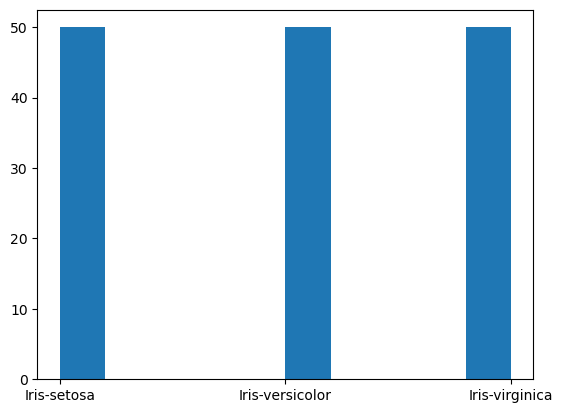

In [15]:
plt.hist(iris['Species'])

<Axes: >

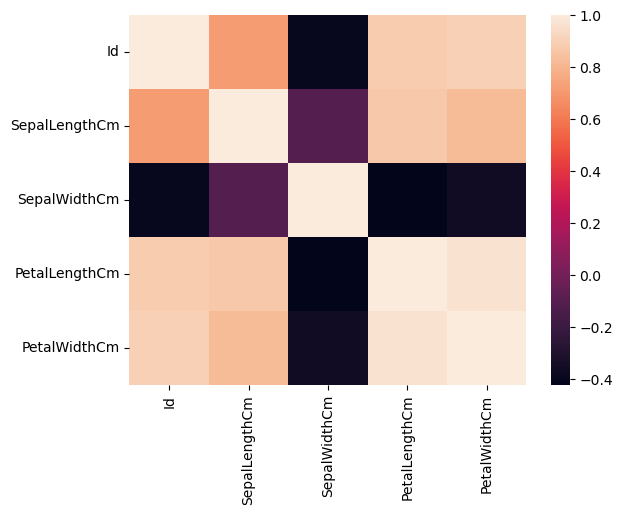

In [16]:
sns.heatmap(iris.select_dtypes(exclude ='object').corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4a9550d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4a9e50d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4a9e42a10>,
 'medians': [<matplotlib.lines.Line2D at 0x1e4a9e52390>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e4a9e52f50>,
 'means': []}

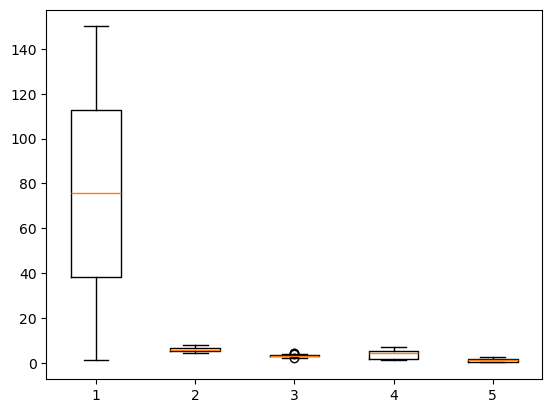

In [17]:
plt.boxplot(iris.select_dtypes(exclude ='object'))

In [18]:
iris.drop(['Id'],axis=1, inplace=True)

In [19]:
X=iris.drop(['Species'],axis=1)
y=iris['Species']

In [20]:
X_train_val,X_test,y_train_val,y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
X_train,X_val, y_train,y_val=train_test_split(X_train_val,y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

In [21]:
encoder= LabelEncoder()
y_train= encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)
y_val=encoder.transform(y_val)

In [22]:
X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape

((96, 4), (96,), (24, 4), (24,), (30, 4), (30,))

In [23]:
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)

In [24]:
model= DecisionTreeClassifier()
param = { 'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 3, 5]}


In [25]:
grid_search= GridSearchCV(estimator=model, param_grid=param,
                               cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10]},
             scoring='accuracy')

In [26]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [27]:
best_model=grid_search.best_estimator_

In [28]:
best_model

DecisionTreeClassifier(max_depth=10, min_samples_split=6)

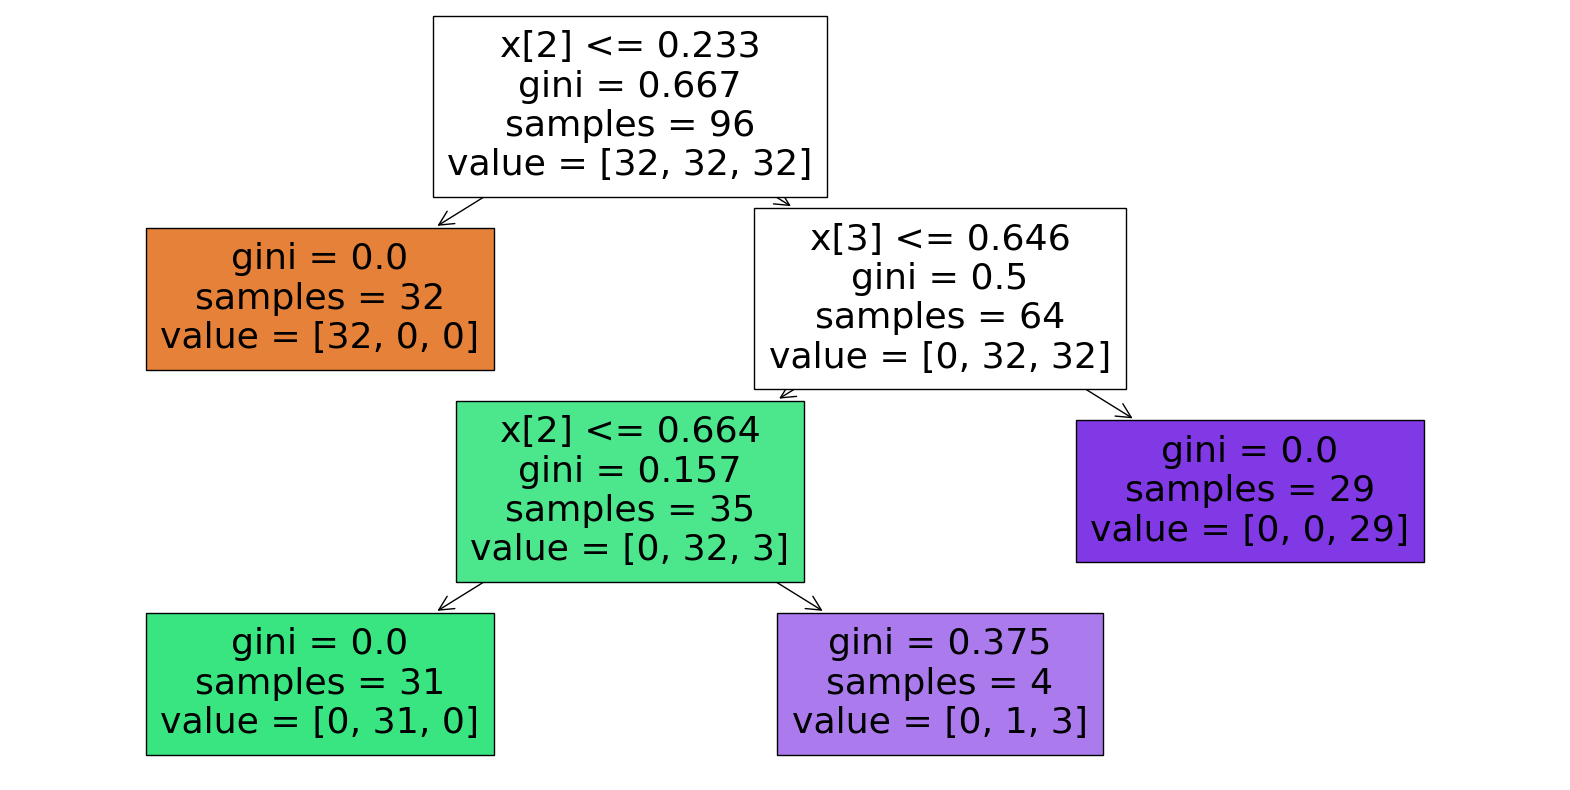

In [29]:
plt.figure(figsize=(20,10))
tree.plot_tree(best_model, filled=True)
plt.show()

In [30]:
y_pred_val = best_model.predict(X_val)
y_pred_val_proba = best_model.predict_proba(X_val)
print(classification_report(y_val, y_pred_val))
print('roc_auc_score', round(roc_auc_score(y_val, y_pred_val_proba, multi_class='ovr'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24

roc_auc_score 0.97


In [31]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
print(classification_report(y_test, y_pred))
print('roc_auc_score', round(roc_auc_score(y_test, y_pred_proba, multi_class='ovr'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

roc_auc_score 0.97


In [32]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

In [33]:
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [34]:
import joblib
joblib.dump(best_model,"Decisiontreeclassifier.pkl")

['Decisiontreeclassifier.pkl']